In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

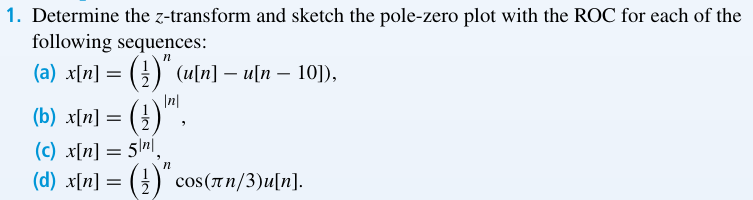

# a)

0.0

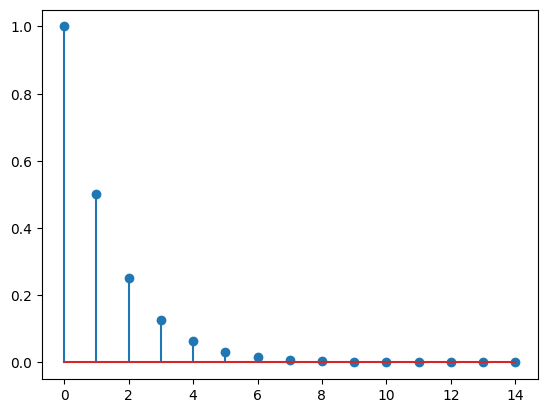

In [4]:
N = np.arange(0,15)
plt.stem(N,((0.5)**N)*(np.heaviside(N,1)-np.heaviside(N-10,1)))
x=((0.5)**N)*(np.heaviside(N,1)-np.heaviside(N-10,1))
x[10]

\begin{align*}
X(z) &= \sum _{k=-\infty} ^{\infty} x[n]z^{-k}\\
\sum _{k=-\infty} ^{\infty} (\frac{1}{2})^k (u[k]-u[k-10])z^{-k}\\
\sum _{k=0} ^{9} (\frac{1}{2})^kz^{-k}\\
\sum _{k=0} ^{9} (\frac{1}{2}z^{-1})^k\\
\end{align*}


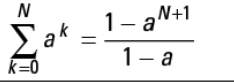

\begin{align*}
X(z)&=\frac{1-(\frac{1}{2}z^{-1})^{10}}{1-\frac{1}{2}z^{-1}}\\
 &=\frac{1-\frac{1}{1024}z^{-10}}{1-\frac{1}{2}z^{-1}}
\end{align*}

$z \neq 0$, da dette er udefineret og pga 

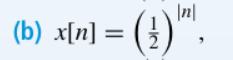

<StemContainer object of 3 artists>

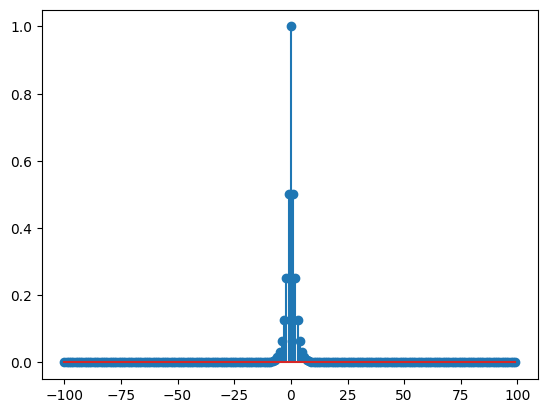

In [5]:
N = np.arange(-100,100)
plt.stem(N,0.5**(abs(N)))

\begin{align*}
X(z) &= \sum _{k=-\infty} ^{\infty} x[k]z^{-k}\\
     &= \sum _{k=-\infty} ^{\infty} (0.5)^{|k|}z^{-k}\\
     &= \sum _{k=-\infty} ^{0} (0.5)^{|k|}z^{-k}+\sum _{k=1} ^{\infty}(0.5)^{|k|}z^{-k}\\
     &= \sum _{k=-\infty} ^{-1} (0.5)^{-k}z^{-k}+\sum _{k=0} ^{\infty}(0.5)^{k}z^{-k}\\
     &= \sum _{k=1} ^{\infty} (0.5)^{k}z^{k}+\sum _{k=0} ^{\infty}(0.5)^{k}z^{-k}\\
     &= 0.5z\sum _{k=0} ^{\infty} (0.5)^{k}z^{k}+\sum _{k=0} ^{\infty}(0.5)^{k}z^{-k}\\
     &= \frac{0.5z}{1-0.5z}+\frac{1}{1-0.5z^{-1}}\\
\end{align*}

ROC: $\frac{1}{2}<|z|<2$

In [5]:
#
# Copyright (c) 2011 Christopher Felton
#
# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
#
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU Lesser General Public License for more details.
#
# You should have received a copy of the GNU Lesser General Public License
# along with this program.  If not, see <http://www.gnu.org/licenses/>.
#

# The following is derived from the slides presented by
# Alexander Kain for CS506/606 "Special Topics: Speech Signal Processing"
# CSLU / OHSU, Spring Term 2011.

import numpy as np
import matplotlib.pyplot as plt
from  matplotlib import patches
from matplotlib.figure import Figure
from matplotlib import rcParams
    
def zplane(b,a,filename=None):
    """Plot the complex z-plane given a transfer function.
    """

    # get a figure/plot
    ax = plt.subplot(111)

    # create the unit circle
    uc = patches.Circle((0,0), radius=1, fill=False,
                        color='black', ls='dashed')
    ax.add_patch(uc)

    # The coefficients are less than 1, normalize the coeficients
    if np.max(b) > 1:
        kn = np.max(b)
        b = b/float(kn)
    else:
        kn = 1

    if np.max(a) > 1:
        kd = np.max(a)
        a = a/float(kd)
    else:
        kd = 1
        
    # Get the poles and zeros
    p = np.roots(a)
    z = np.roots(b)
    k = kn/float(kd)
    
    # Plot the zeros and set marker properties    
    t1 = plt.plot(z.real, z.imag, 'go', ms=10)
    plt.setp( t1, markersize=10.0, markeredgewidth=1.0,
              markeredgecolor='k', markerfacecolor='g')

    # Plot the poles and set marker properties
    t2 = plt.plot(p.real, p.imag, 'rx', ms=10)
    plt.setp( t2, markersize=12.0, markeredgewidth=3.0,
              markeredgecolor='r', markerfacecolor='r')

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # set the ticks
    r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
    ticks = [-1, -.5, .5, 1]; plt.xticks(ticks); plt.yticks(ticks)

    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)
    

    return z, p, k

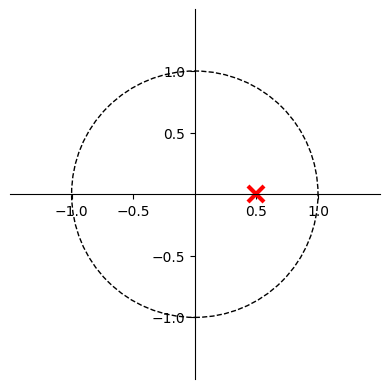

(array([], dtype=float64), array([2. , 0.5]), 1.2)

In [8]:
a=np.array([-0.5,1.25,-0.5])
b=np.array([0,1.5])
zplane(b,a)

array([[list([<matplotlib.lines.Line2D object at 0x000001A23FE18510>]),
        list([<matplotlib.lines.Line2D object at 0x000001A23FE8E690>])]],
      dtype=object)

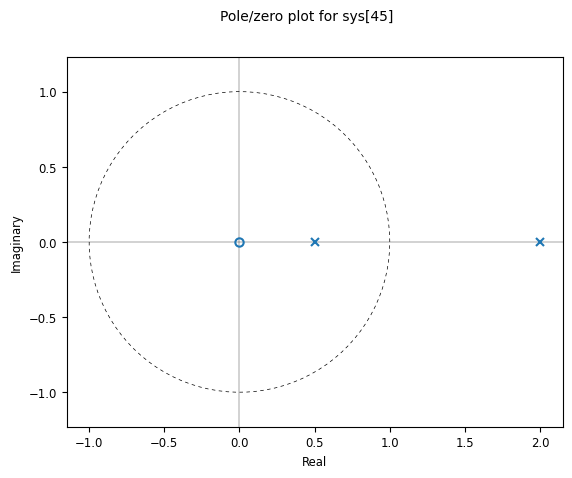

In [12]:
import control
z = control.TransferFunction.z
S=(0.5*z)/(1-0.5*z)+1/(1-0.5*z**(-1))
control.pzmap(S)